In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### 간략한 hypothesis 구현

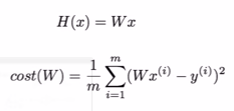

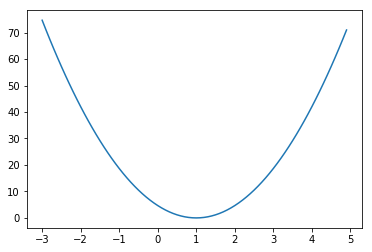

In [2]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session.
sess = tf.Session()
# Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

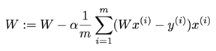

In [3]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [6]:
# Our hypothesis for linear model X * W
hypothesis = X * W

In [8]:
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

In [10]:
# Minimize: Gradient Descent using derivative: W -= Learing_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [11]:
# Launch the graph in a session
sess = tf.Session()
#Inintializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.222879 [ 1.12617421]
1 0.0633967 [ 1.06729293]
2 0.0180328 [ 1.03588951]
3 0.00512932 [ 1.01914108]
4 0.00145902 [ 1.01020861]
5 0.000415022 [ 1.00544465]
6 0.000118048 [ 1.00290382]
7 3.35815e-05 [ 1.00154877]
8 9.55248e-06 [ 1.000826]
9 2.71598e-06 [ 1.00044048]
10 7.72729e-07 [ 1.00023496]
11 2.19673e-07 [ 1.00012529]
12 6.26622e-08 [ 1.00006688]
13 1.7761e-08 [ 1.00003564]
14 5.09317e-09 [ 1.00001907]
15 1.44469e-09 [ 1.00001013]
16 4.06729e-10 [ 1.00000536]
17 1.14596e-10 [ 1.00000286]
18 3.47455e-11 [ 1.00000155]
19 9.166e-12 [ 1.00000083]
20 3.18323e-12 [ 1.00000048]


### Gradient Descent Optimizer 이용

In [13]:
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

#Linear model
hypothesis = X * W
# cost/loss function
cost =tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.26667
2 1.01778
3 1.00119
4 1.00008
5 1.00001
6 1.0
7 1.0
8 1.0
9 1.0


### Gradient 계산과 Gradient 적용

In [52]:
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess =tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(100):
    print(step, sess.run([gradient, W]))
    sess.run(apply_gradients)


0 [37.333332, 5.0]
1 [33.848888, 4.6266665]
2 [30.689655, 4.2881775]
3 [27.825289, 3.981281]
4 [25.228264, 3.7030282]
5 [22.873627, 3.4507456]
6 [20.738754, 3.2220094]
7 [18.803141, 3.014622]
8 [17.04818, 2.8265905]
9 [15.457016, 2.6561089]
10 [14.014363, 2.5015388]
11 [12.706355, 2.3613951]
12 [11.520428, 2.2343316]
13 [10.445188, 2.1191273]
14 [9.4703045, 2.0146754]
15 [8.5864086, 1.9199723]
16 [7.7850103, 1.8341082]
17 [7.0584097, 1.7562581]
18 [6.3996248, 1.6856741]
19 [5.8023272, 1.6216779]
20 [5.2607765, 1.5636547]
21 [4.7697711, 1.5110469]
22 [4.3245926, 1.4633492]
23 [3.9209647, 1.4201033]
24 [3.5550079, 1.3808937]
25 [3.223207, 1.3453436]
26 [2.9223742, 1.3131115]
27 [2.6496186, 1.2838877]
28 [2.4023216, 1.2573916]
29 [2.1781051, 1.2333684]
30 [1.9748147, 1.2115873]
31 [1.7904994, 1.1918392]
32 [1.6233861, 1.1739342]
33 [1.4718704, 1.1577004]
34 [1.3344965, 1.1429818]
35 [1.2099432, 1.1296368]
36 [1.0970153, 1.1175374]
37 [0.99462759, 1.1065673]
38 [0.90179634, 1.096621]
39 [0